In [2]:
%load_ext autoreload
%autoreload 2

import os
if os.getcwd().split('/').pop() == 'demo_SBM':
	os.chdir(os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))))
import SBM.utils.utils as ut
import SBM.utils.utils_plot as up
import SBM.utils.utils_plot_energies as upe
import numpy as np
import matplotlib.pyplot as plt

# SBM results

In [3]:
output = np.load('results/CM/CM_m1Ns20Ni10R0.npy',allow_pickle=True)[()]
if 'k_MCMC' in list(output['options'].keys()):k_mc = output['options']['k_MCMC']
else: k_mc = output['options']['delta_t']
# generate artificial alignement with Monte Carlo
align_mod = ut.Create_modAlign(output,output['align'].shape[0],delta_t = k_mc,temperature=1)
output['align_mod'] = align_mod

In [4]:
# compute statistics
Stats = ut.compute_stats(output,align_mod)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 166/166 [00:00<00:00, 4737.62it/s]


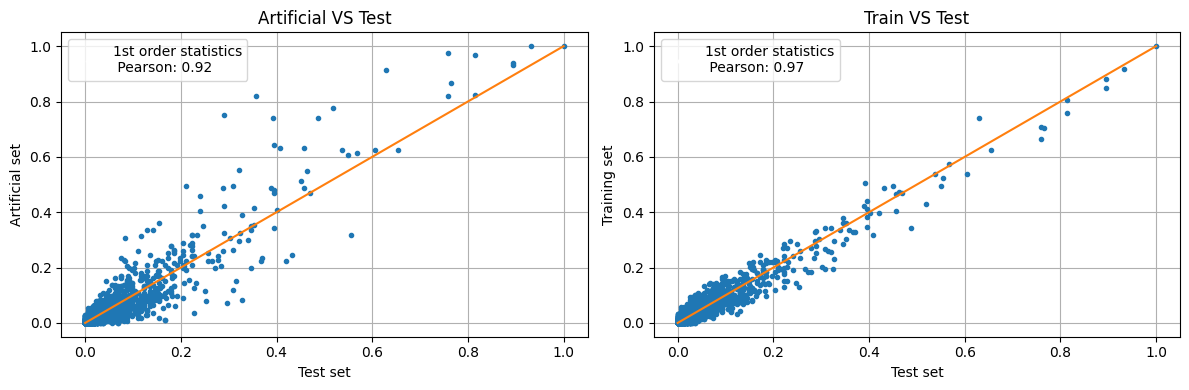

In [5]:
# Plot frequencies
up.plot_stats(output,Stats,plot = 'Freq')

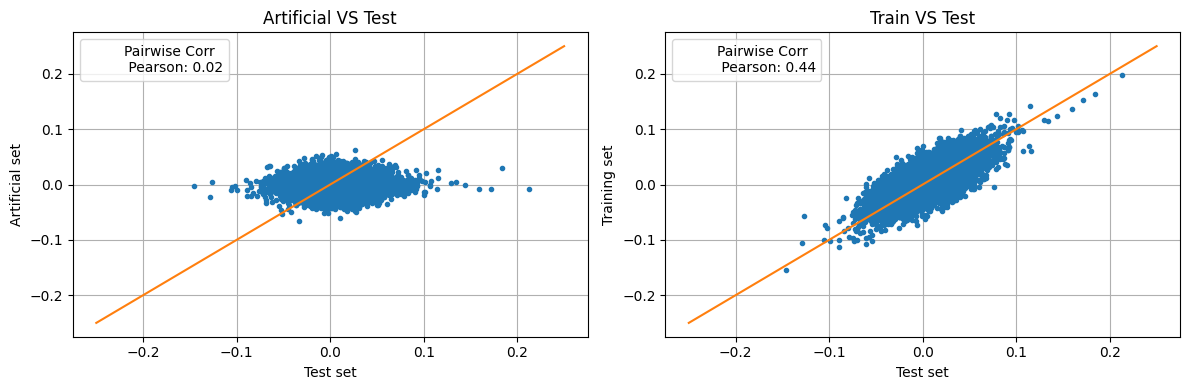

In [6]:
# Plot Pairwise correlations
up.plot_stats(output,Stats,plot = 'Pair_freq',ma = 0.25)

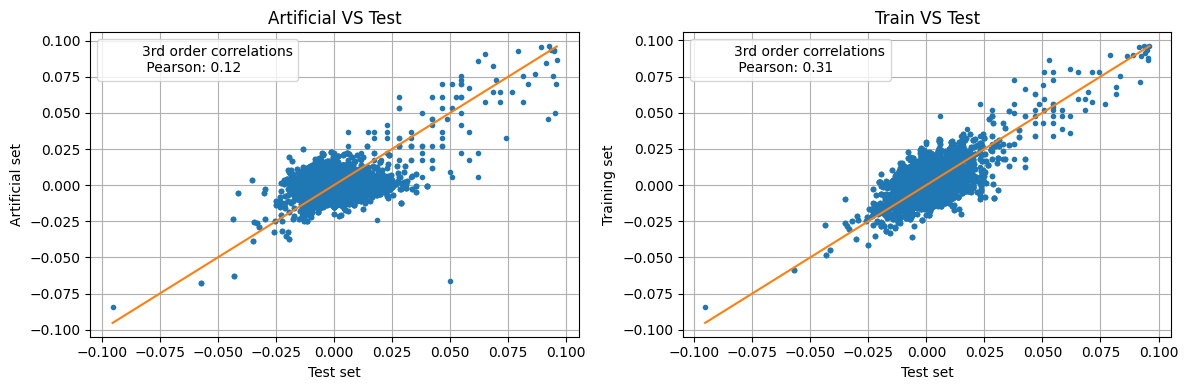

In [7]:
# Plot 3rd order correlations
up.plot_stats(output,Stats,plot = 'Corr3')

7.860648751153542 %
Dist: 1.2573679164755815
0.0025159514646832816 0.10596685436546555
0.006124353186512532 0.641942572129397


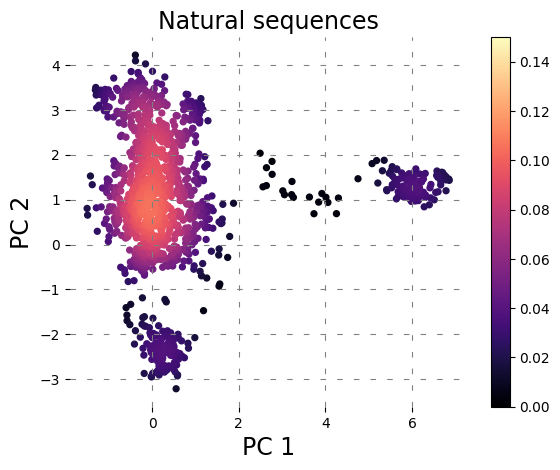

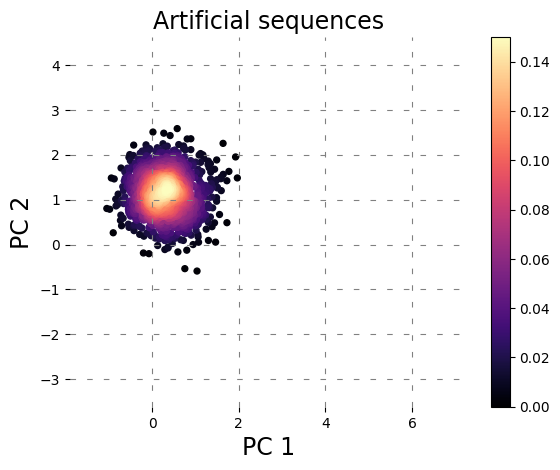

In [8]:
# Plot PCA
up.plot_stats(output,Stats,plot = 'PCA')

In [ ]:
file_name = ['CM_m1Ns20Ni10R0.npy']
Mod_list = ['SBM']
upe.BARplot_energies(file_name,Mod_list,'CM',delta_t=k_mc,Temp=1)

In [ ]:
file_name = ['CM_m1Ns20Ni10R0.npy']
Mod_list = ['SBM']
up.BARplot_distances(file_name,Mod_list,'CM',delta_t=1e5,Temp=1)

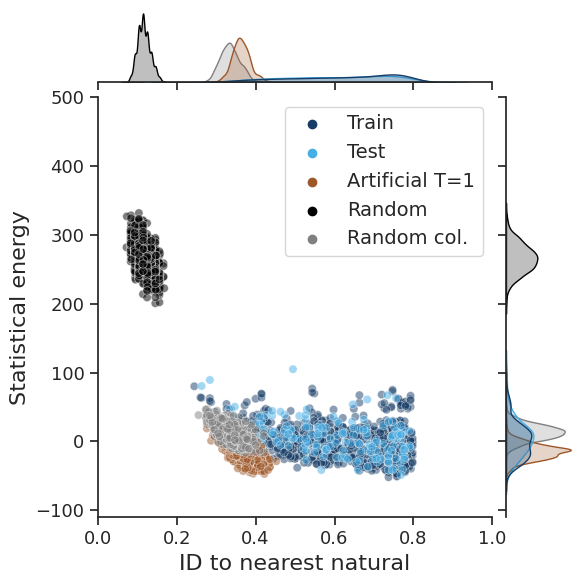

In [9]:
up.plot_2Dhistogram_SimEnergy(output,Titre = '',Ylimit = [-110,500],RAND=True)